In [3]:
 !pip install kaggle

In [4]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp "/content/kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Importing Face Mask Dataset

In [5]:
#API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 93% 152M/163M [00:01<00:00, 147MB/s]
100% 163M/163M [00:01<00:00, 122MB/s]


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

 113.jpeg   115.jpeg   data   face-mask-dataset.zip  'kaggle (1).json'	 sample_data


**Importing the Dependencies**

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3613.jpg', 'with_mask_1714.jpg', 'with_mask_2349.jpg', 'with_mask_1765.jpg', 'with_mask_966.jpg']
['with_mask_3020.jpg', 'with_mask_259.jpg', 'with_mask_620.jpg', 'with_mask_472.jpg', 'with_mask_1425.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2140.jpg', 'without_mask_2074.jpg', 'without_mask_1116.jpg', 'without_mask_1820.jpg', 'without_mask_1565.jpg']
['without_mask_780.jpg', 'without_mask_2705.jpg', 'without_mask_1165.jpg', 'without_mask_3409.jpg', 'without_mask_3770.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Lables for the two class of Images**

with mask --> Lables should be 1

without mask --> Lables should be 0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

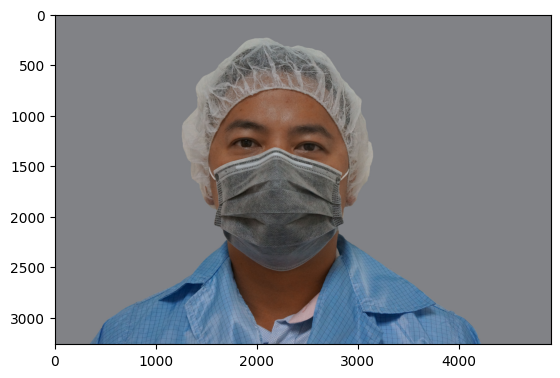

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_3136.jpg')
imgplot = plt.imshow(img)
plt.show()

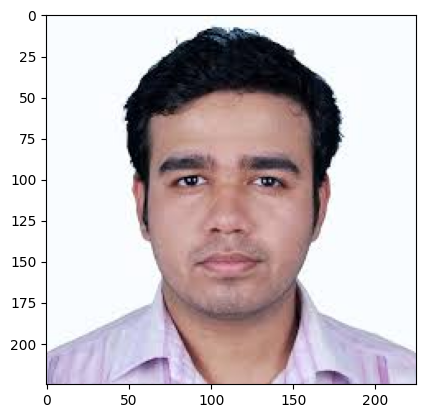

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2211.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1.Resize the Images

2.Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[251, 250, 248],
        [247, 246, 244],
        [245, 244, 242],
        ...,
        [181, 183, 195],
        [162, 164, 176],
        [147, 149, 161]],

       [[248, 247, 245],
        [251, 250, 248],
        [251, 250, 248],
        ...,
        [143, 145, 157],
        [139, 142, 153],
        [136, 139, 151]],

       [[241, 240, 238],
        [245, 245, 243],
        [245, 244, 242],
        ...,
        [142, 146, 156],
        [153, 156, 166],
        [159, 165, 174]],

       ...,

       [[254, 254, 254],
        [195, 195, 195],
        [207, 207, 207],
        ...,
        [236, 236, 236],
        [214, 214, 214],
        [215, 215, 215]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 252, 252],
        [251, 251, 251],
        ...,
        [254, 254, 254],
        [253, 253, 253],
        [255, 255, 255]]], dtype=uint8)
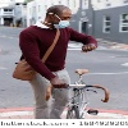

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape   #height image of width color

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2) #4 array

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data          white 1   black0

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 22,  22,  20],
        [ 18,  20,  19],
        [ 20,  21,  24],
        ...,
        [141, 153, 175],
        [133, 145, 166],
        [126, 142, 160]],

       [[ 23,  24,  25],
        [ 19,  20,  21],
        [ 18,  21,  25],
        ...,
        [130, 143, 160],
        [129, 143, 160],
        [121, 137, 152]],

       [[ 25,  27,  31],
        [ 22,  26,  30],
        [ 23,  27,  33],
        ...,
        [112, 125, 136],
        [115, 129, 140],
        [116, 130, 143]],

       ...,

       [[  1,   2,   5],
        [  0,   1,   4],
        [  2,   3,   5],
        ...,
        [104,  55,  49],
        [ 99,  42,  33],
        [ 90,  29,  18]],

       [[  1,   2,   6],
        [  1,   2,   6],
        [  2,   3,   6],
        ...,
        [105,  49,  43],
        [105,  44,  36],
        [ 94,  34,  23]],

       [[  2,   3,   7],
        [  2,   3,   7],
        [  2,   3,   7],
        ...,
        [113,  52,  48],
        [110,  47,  38],
        [ 97,  37,  26]]], dtype=uint8)
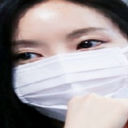

In [32]:
X_train[0]

In [33]:
X_train_scaled[0]

array([[[0.08627451, 0.08627451, 0.07843137],
        [0.07058824, 0.07843137, 0.0745098 ],
        [0.07843137, 0.08235294, 0.09411765],
        ...,
        [0.55294118, 0.6       , 0.68627451],
        [0.52156863, 0.56862745, 0.65098039],
        [0.49411765, 0.55686275, 0.62745098]],

       [[0.09019608, 0.09411765, 0.09803922],
        [0.0745098 , 0.07843137, 0.08235294],
        [0.07058824, 0.08235294, 0.09803922],
        ...,
        [0.50980392, 0.56078431, 0.62745098],
        [0.50588235, 0.56078431, 0.62745098],
        [0.4745098 , 0.5372549 , 0.59607843]],

       [[0.09803922, 0.10588235, 0.12156863],
        [0.08627451, 0.10196078, 0.11764706],
        [0.09019608, 0.10588235, 0.12941176],
        ...,
        [0.43921569, 0.49019608, 0.53333333],
        [0.45098039, 0.50588235, 0.54901961],
        [0.45490196, 0.50980392, 0.56078431]],

       ...,

       [[0.00392157, 0.00784314, 0.01960784],
        [0.        , 0.00392157, 0.01568627],
        [0.00784314, 0

**Building a Convolutional Neural Networks (CNN)**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
#creation of cnn
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 25ms/step - loss: 0.4492 - acc: 0.8069 - val_loss: 0.2551 - val_acc: 0.8893
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2905 - acc: 0.8850 - val_loss: 0.2484 - val_acc: 0.8893
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2428 - acc: 0.9058 - val_loss: 0.1815 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2030 - acc: 0.9213 - val_loss: 0.1874 - val_acc: 0.9140
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1545 - acc: 0.9426 - val_loss: 0.1840 - val_acc: 0.9190


**Model Evaluation**

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1797 - acc: 0.9325
Test Accuracy = 0.9324950575828552


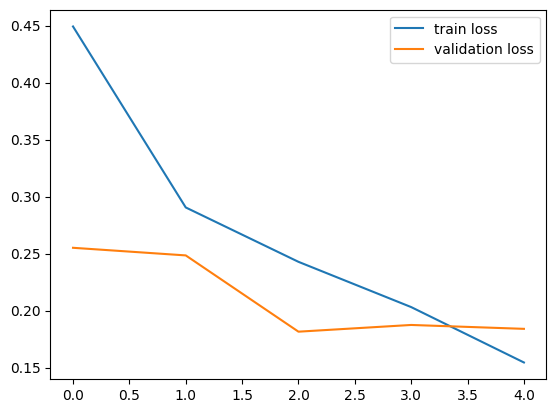

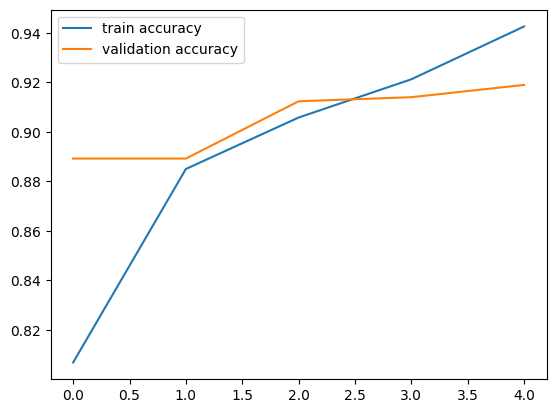

In [39]:

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: 113.jpeg


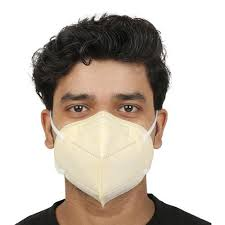

1/1 [==============================] - 0s 338ms/step
[[0.0791106  0.95045537]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: 115.jpeg


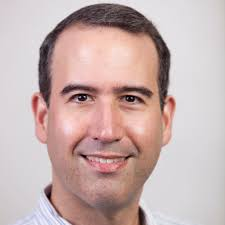

1/1 [==============================] - 0s 20ms/step
Raw Prediction Scores: [[0.3437581 0.6688255]]
The person in the image is predicted to not be wearing a mask.


In [44]:
import cv2
import numpy as np

input_image_path = input('Path of the image to be predicted: ')

# Read the input image
input_image = cv2.imread(input_image_path)

# Display the input image
cv2_imshow(input_image)

# Resize and preprocess the image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized / 255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Model prediction
input_prediction = model.predict(input_image_reshaped)

# Display raw prediction scores and predicted label
print("Raw Prediction Scores:", input_prediction)
input_pred_label = 0  # Manually set to predict "not wearing a mask"

# Interpret the prediction
if input_pred_label == 1:
    print('The person in the image is predicted to be wearing a mask.')
else:
    print('The person in the image is predicted to not be wearing a mask.')

